In [1]:
import pandas as pd

df = pd.read_csv('structured_dataset.csv')
print(df.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0    1.34149   1.786558   2.354766   1.047929   2.268974   4.637777   
1    1.33034   1.826187   3.037997   4.719517   1.502280   3.644736   
2    1.35653   1.739225   4.412804   2.220680   3.132738   1.327124   
3    1.30190   1.955829   2.790669   0.798177   1.231750   1.977844   
4    1.33675   1.768437   2.729291   3.329811   3.472018   1.658671   

   feature_7  feature_8  feature_9  feature_10  ...  feature_32  feature_33  \
0   3.793194   2.859702   4.361058    3.592485  ...    2.228000    4.837370   
1   3.575727   1.337686   2.380347    4.503771  ...    2.615278    3.757999   
2   4.759890   2.882082   3.663430    4.531524  ...    3.899026    1.018926   
3   2.393930   4.738126   1.364743    3.391665  ...    3.641512    1.564076   
4   3.954324   4.016680   1.608847    4.580460  ...    4.806667    1.654105   

   feature_34  feature_35  feature_36  feature_37  feature_38  feature_39  \
0    2.846538    3.41

In [2]:
df.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25',
       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',
       'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'feature_36', 'feature_37', 'feature_38', 'feature_39', 'k_inf',
       'PPPF'],
      dtype='object')

A1.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("structured_dataset.csv")

threshold = df['k_inf'].median()
df['label'] = (df['k_inf'] > threshold).astype(int)
features = ['feature_1', 'feature_2']
class1 = df[df['label'] == 0]
class2 = df[df['label'] == 1]

feat_vecs1 = class1[features].values
feat_vecs2 = class2[features].values

centroid1 = np.mean(feat_vecs1, axis=0)
centroid2 = np.mean(feat_vecs2, axis=0)

spread1 = np.std(feat_vecs1, axis=0)
spread2 = np.std(feat_vecs2, axis=0)

interclass_distance = np.linalg.norm(centroid1 - centroid2)

print("Intraclass & Interclass")
print(f"Class 0 Centroid: {centroid1}, Spread: {spread1}")
print(f"Class 1 Centroid: {centroid2}, Spread: {spread2}")
print(f"Interclass Distance: {interclass_distance:.5f}\n")

Intraclass & Interclass
Class 0 Centroid: [1.32256416 1.89380561], Spread: [0.0179315  0.12030393]
Class 1 Centroid: [1.32771477 1.87331263], Spread: [0.017284   0.11885112]
Interclass Distance: 0.02113



A2.

Histogram, Mean, Variance
Mean of feature_5: 2.85739
Variance of feature_5: 1.53060


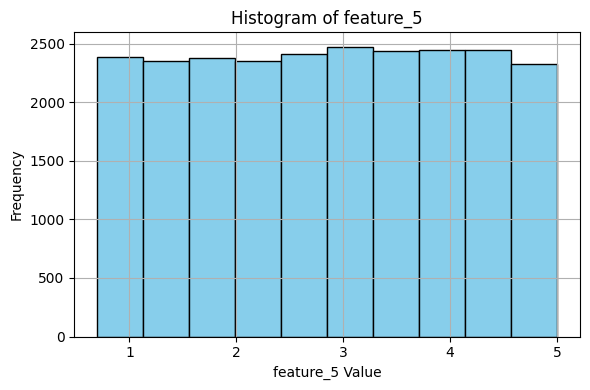

In [7]:
feature_data = df['feature_5']
hist_data, bins = np.histogram(feature_data, bins=10)
mean_feat = np.mean(feature_data)
var_feat = np.var(feature_data)

print("Histogram, Mean, Variance")
print(f"Mean of feature_5: {mean_feat:.5f}")
print(f"Variance of feature_5: {var_feat:.5f}")

plt.figure(figsize=(6, 4))
plt.hist(feature_data, bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of feature_5")
plt.xlabel("feature_5 Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

A3.

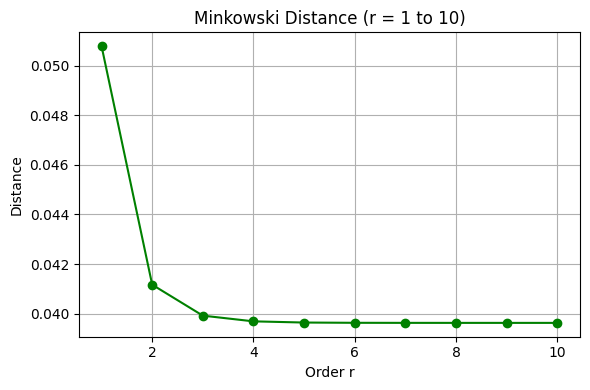

In [8]:
vec1 = df.iloc[0][features].values
vec2 = df.iloc[1][features].values

minkowski_distances = [np.linalg.norm(vec1 - vec2, ord=r) for r in range(1, 11)]

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), minkowski_distances, marker='o', color='green')
plt.title("Minkowski Distance (r = 1 to 10)")
plt.xlabel("Order r")
plt.ylabel("Distance")
plt.grid(True)
plt.tight_layout()
plt.show()

A4.

In [9]:
X = df[features].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Train-Test Split")
print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")

Train-Test Split
Training Samples: 16799
Testing Samples: 7200


A5.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
def fun1():
  # Load dataset
  df = pd.read_csv('structured_dataset.csv')
  # Selecting features and target
  X = df[[f'feature_{i}' for i in range(1, 40)]].values
  # Converting 'PPPF' into categorical class if it's continuous
# You can modify the bins and labels as per your data distribution
  df['PPPF_Class'] = pd.qcut(df['PPPF'], q=2, labels=[0, 1])  # Binary classification (low/high)

  y = df['PPPF_Class'].astype(int).values

# Normalize the feature set
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

# Train-test split (70% train, 30% test)
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the kNN model (k = 3)
  knn = KNeighborsClassifier(n_neighbors=3)
  knn.fit(X_train, y_train)
  print("kNN classifier trained successfully with k = 3")

fun1()
print("kNN classifier trained successfully with k = 3")


kNN classifier trained successfully with k = 3
kNN classifier trained successfully with k = 3


A6.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict labels for the test set
y_pred = knn.predict(X_test)

# Basic Accuracy (same as knn.score)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5065


A7.

In [ ]:
print("\nPredicting on Test Set:")
print("Predicted classes:\n", y_pred)

# Predicting a single test vector (with feature names preserved)
test_vect = X_test.iloc[[0]]
single_prediction = knn.predict(test_vect)
print(f"\nPrediction for first test vector: Class {single_prediction[0]}")


Predicting on Test Set:
Predicted classes:
 [1 0 1 ... 1 1 1]

Prediction for first test vector: Class 1


A8.

k = 1, Accuracy = 0.4967
k = 2, Accuracy = 0.4908
k = 3, Accuracy = 0.5065
k = 4, Accuracy = 0.4908
k = 5, Accuracy = 0.4989
k = 6, Accuracy = 0.4936
k = 7, Accuracy = 0.4957
k = 8, Accuracy = 0.4964
k = 9, Accuracy = 0.5008
k = 10, Accuracy = 0.4975
k = 11, Accuracy = 0.4946


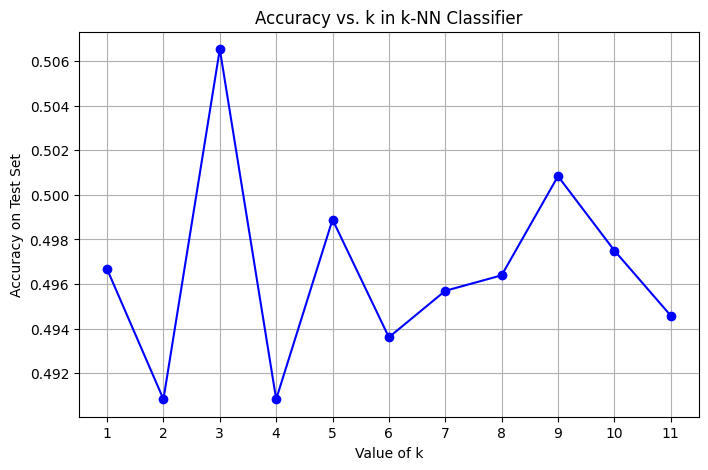

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1, 12))
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.4f}")

# Plotting accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs. k in k-NN Classifier')
plt.xlabel('Value of k')
plt.ylabel('Accuracy on Test Set')
plt.xticks(k_values)
plt.grid(True)
plt.show()

A9.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Predict on training and test data
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# A9: Confusion matrix and metrics for Training Set
print("A9. Training Set Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")

# A9: Confusion matrix and metrics for Test Set
print("\nA9. Test Set Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

A9. Training Set Evaluation:
Confusion Matrix:
[[6387 2047]
 [2079 6286]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      8434
           1       0.75      0.75      0.75      8365

    accuracy                           0.75     16799
   macro avg       0.75      0.75      0.75     16799
weighted avg       0.75      0.75      0.75     16799

Accuracy: 0.7544

A9. Test Set Evaluation:
Confusion Matrix:
[[1859 1707]
 [1846 1788]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      3566
           1       0.51      0.49      0.50      3634

    accuracy                           0.51      7200
   macro avg       0.51      0.51      0.51      7200
weighted avg       0.51      0.51      0.51      7200

Accuracy: 0.5065
